<a href="https://colab.research.google.com/github/ganuwoahh/tdlta/blob/main/Week1_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dropout** is a regularization technique used to prevent overfitting in neural networks by randomly "dropping out" units (nodes) during training.

# **Dropout**

Neural networks often overfit when they have many parameters relative to the amount of training data. Overfitting occurs because the network learns spurious patterns and dependencies in the training data that do not generalize to unseen data. Dropout addresses this by introducing noise during training, which forces the network to learn robust features that are less reliant on specific neurons or activations.

During training, dropout randomly deactivates (sets to zero) a fraction
𝑝
of the neurons in a given layer. The fraction of neurons to drop is controlled by the dropout rate,
𝑝
∈
[
0
,
1
]
. Typically,
𝑝
is set between 0.2 and 0.5.
This stochastic process ensures that no single neuron or subset of neurons becomes overly dominant in determining the output.

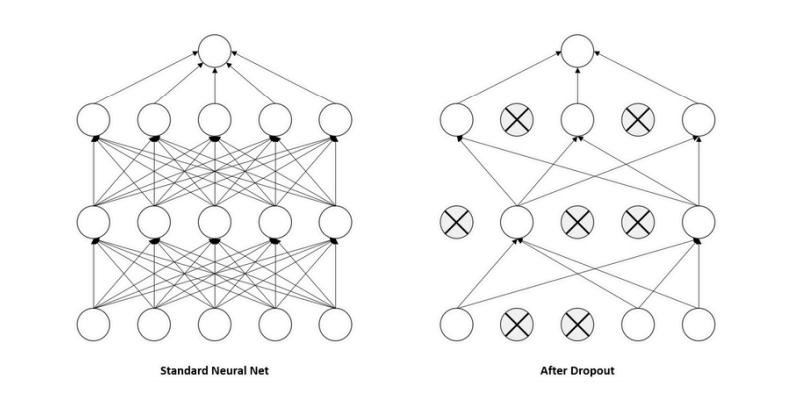

Dropout is not used after training when making predictions. The weights of the network will be
larger than normal because of dropout. Therefore, before finalizing the network, the weights are
first scaled by the chosen dropout rate.

The rescaling of the weights can also be performed at training time instead, after each weight
update at the end of the mini-batch. This is called “inverse dropout” and does not require any
modification of weights during training.

Some of the advantages of Dropout are:

*   Forces the network to learn distributed representations.
*   Reduces overfitting by introducing noise.
*   Acts as an ensemble of subnetworks during training.

Let's take a look at an example using simple binary classification:

In [ ]:
#importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing dataset
df = pd.read_csv("./week1_1.csv", header = None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
81,0.0100,0.0194,0.0155,0.0489,0.0839,0.1009,0.1627,0.2071,0.2696,0.2990,...,0.0130,0.0073,0.0077,0.0075,0.0060,0.0080,0.0019,0.0053,0.0019,R
56,0.0152,0.0102,0.0113,0.0263,0.0097,0.0391,0.0857,0.0915,0.0949,0.1504,...,0.0049,0.0041,0.0036,0.0013,0.0046,0.0037,0.0011,0.0034,0.0033,R
139,0.0164,0.0627,0.0738,0.0608,0.0233,0.1048,0.1338,0.0644,0.1522,0.0780,...,0.0258,0.0143,0.0226,0.0187,0.0185,0.0110,0.0094,0.0078,0.0112,M
88,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173,R
149,0.0207,0.0535,0.0334,0.0818,0.0740,0.0324,0.0918,0.1070,0.1553,0.1234,...,0.0033,0.0050,0.0190,0.0103,0.0121,0.0042,0.0090,0.0070,0.0099,M


In [ ]:
df.shape

(208, 61)

Our dataset has 208 rows of data in 61 fields. The 61st field is the target variable, M or R. We need to split this into X and y such that y is a function of X.

In [ ]:
#checking for null entries
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [ ]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [ ]:
#checking that there is enough data for each

df[60].value_counts()

,count
60,
M,111
R,97


In [ ]:
#y is the target variable. X is everything else

X = df.drop(60, axis='columns')
y = df[60]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [ ]:
y

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [ ]:
#performing one-hot encoding. dropping the first dummy since it's the compliment of the other one and is redundant

y = pd.get_dummies(y, drop_first=True)
y.sample(5)

,R
137,False
207,False
19,True
133,False
45,True


In [ ]:
#split 75:25 train:test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

## **Without Dropout**

In [ ]:
import tensorflow as tf
from tensorflow import keras

We're going to use a simple ANN with ReLU activation for the hidden layers and sigmoid for the output layer.

Since we're doing binary classification, loss function must be Binary Crossentropy.

In [ ]:
model_wo = keras.Sequential([
                          keras.layers.Dense(60, input_dim=60, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model_wo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_wo = model_wo.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6197 - loss: 0.6877
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 0.6642 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.6433 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7366 - loss: 0.6139 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.5930 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.5779 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.5515 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4707 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4404 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.4211 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4443 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

**Training Accuracy: 100%**

In [ ]:
test_loss_wo, test_accuracy_wo = model_wo.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7524 - loss: 1.1283 


**Test Accuracy: 75.24%**

Clearly something has gone wrong. The model performs much worse on the Test dataset than the Training dataset. This is due to overfitting.

We need to purposefully reduce the training accuracy and generalise the model such that it performs better on the Testing dataset.

In [ ]:
#calculating a predicted sample and finding other metrics

y_pred = model_wo.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[2.3477785e-08 9.8913926e-01 9.7349751e-01 4.6555272e-07 9.9999756e-01
 9.9971080e-01 5.3633589e-01 9.9999875e-01 2.7613248e-06 9.9999744e-01]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [ ]:
y_test[:10]

,R
186,False
155,False
165,False
200,False
58,True
34,True
151,False
18,True
202,False
62,True


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.85      0.78        27
        True       0.80      0.64      0.71        25

    accuracy                           0.75        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52



**F1 Score: 0.75**

## **With Dropout**

In [ ]:
import tensorflow as tf
from tensorflow import keras

This time let's implement Dropout.

We need to add a Dropout after each hidden layer. It will then randomly drop neurons from the above layer based on the probability given. We'll go with 0.4 but it can vary from 0.2 - 0.5.

This also means that you won't get the same results every time.

In [ ]:
model_w = keras.Sequential([
                          keras.layers.Dense(60, input_dim=60, activation='relu'),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model_w.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_w = model_w.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4925 - loss: 0.7263
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4881 - loss: 0.7206 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 0.6937 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5005 - loss: 0.7079  
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5602 - loss: 0.6651 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5316 - loss: 0.6934 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.6567 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - loss: 0.6466 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5259 - loss: 0.6972 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.6415  
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 0.6662 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

**Training Accuracy: 91.46%**

In [ ]:
test_loss_w, test_accuracy_w = model_w.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7885 - loss: 0.5740  


**Test Accuracy: 78.85%**

As you can see, there is a slight improvement in the test accuracy even though the Training accuracy went down.

However, Test Accuracy is more important and useful.

In [ ]:
y_pred = model_w.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[1.5079571e-04 3.7949792e-01 9.6318477e-01 1.0586518e-02 9.9985814e-01
 9.8998487e-01 5.0792545e-01 9.9937612e-01 1.3096509e-02 9.9988931e-01]
[0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]


In [ ]:
y_test[:10]

,R
186,False
155,False
165,False
200,False
58,True
34,True
151,False
18,True
202,False
62,True


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.93      0.83        27
        True       0.89      0.68      0.77        25

    accuracy                           0.81        52
   macro avg       0.83      0.80      0.80        52
weighted avg       0.82      0.81      0.80        52



**F1 Score: 0.81**

## Graphs

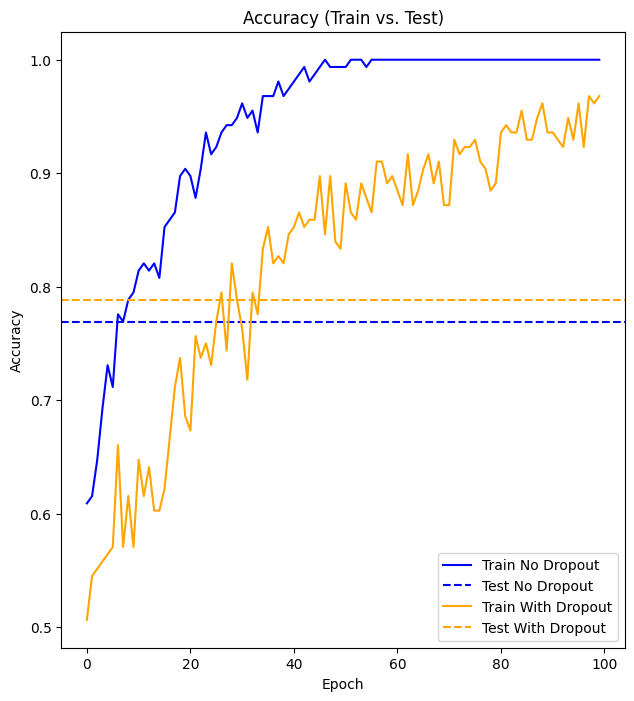

In [ ]:
# Plot Training and Testing Metrics
plt.figure(figsize=(16, 8))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_wo.history['accuracy'], label='Train No Dropout', color='blue')
plt.axhline(y=test_accuracy_wo, color='blue', linestyle='--', label='Test No Dropout')
plt.plot(history_w.history['accuracy'], label='Train With Dropout', color='orange')
plt.axhline(y=test_accuracy_w, color='orange', linestyle='--', label='Test With Dropout')
plt.title('Accuracy (Train vs. Test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

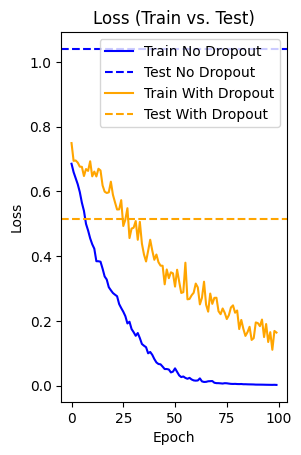

In [ ]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_wo.history['loss'], label='Train No Dropout', color='blue')
plt.axhline(y=test_loss_wo, color='blue', linestyle='--', label='Test No Dropout')
plt.plot(history_w.history['loss'], label='Train With Dropout', color='orange')
plt.axhline(y=test_loss_w, color='orange', linestyle='--', label='Test With Dropout')
plt.title('Loss (Train vs. Test)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()